In [54]:
import numpy as np
import pandas as pd

In [31]:
# Read the CSV files as DataFrames
df1 = pd.read_csv('benign_urls.csv')
df2 = pd.read_csv('valid_phish_urls.csv')

# Merge the DataFrames
df = pd.concat([df1, df2], ignore_index=True)

# Save the merged DataFrame as a new CSV file
df.to_csv('merged_urls.csv', index=False)

In [33]:
df.head(-5)

,Category,URL
0,HAM,https://urlscan.io/result/e6cb5bed-fa87-4317-b...
1,HAM,https://www.mercadopago.com.br/added on May 26...
2,HAM,https://onedrive.live.com/about/es-us-signin/a...
3,HAM,http://url.zp.edu.ua/added on May 26th 2023 5:...
4,HAM,https://bitflyer.com/en-us/added on May 26th 2...
...,...,...
390,SPAM,https://cf-ipfs.com/ipfs/QmW8WdEtMU9je3H7BYL5L...
391,SPAM,https://bafybeidtyfrjzjnxzkv4bykjyj7sxpakv2rfo...
392,SPAM,https://ipfs.io/ipfs/QmW8WdEtMU9je3H7BYL5L1gqV...
393,SPAM,https://ipfs.eth.aragon.network/ipfs/bafybeidt...


In [34]:
df.shape

(400, 2)

In [36]:
# Create a new column "Label" based on the "Category" column
df['Label'] = df['Category'].apply(lambda x: 1 if x == 'SPAM' else 0)

# Save the updated DataFrame as a new CSV file
df.to_csv('merged_urls_with_label.csv', index=False)

print('Merged data with labels saved to merged_urls_with_label.csv')

Merged data with labels saved to merged_urls_with_label.csv


**Lexical Analysis**

In [45]:
import re

def dot_count(url):
    return url.count('.')

def url_len(url):
    return len(url)

def digit_count(url):
    return sum(1 for char in url if char.isdigit())

def protocol(url):
    return 1 if re.match('^https://', url) else 0

def hypen_count(url):
    return url.count('-')

def double_slash_count(url):
    return url.count('//')

def single_slash_count(url):
    return url.count('/')

def special_characters_count(url):
    special_chars = r':;#!%~+_?=&,\[\]'
    return sum(1 for char in url if char in special_chars)

def at_sign_count(url):
    return url.count('@')

# Apply the feature extraction functions to the URLs
df['Label'] = (df['Category'] == 'SPAM').astype(int)
df['HTTP_Protocol'] = df['URL'].apply(protocol)
df['Dot_count'] = df['URL'].apply(dot_count)
df['url_len'] = df['URL'].apply(url_len)
df['Digit_count'] = df['URL'].apply(digit_count)
df['Hypen_count'] = df['URL'].apply(hypen_count)
df['Double_slash_count'] = df['URL'].apply(double_slash_count)
df['Single_slash_count'] = df['URL'].apply(single_slash_count)
df['Special_characters_count'] = df['URL'].apply(special_characters_count)
df['At_sign_count'] = df['URL'].apply(at_sign_count)


In [46]:
# Extract the URL lexical analysis results
lexical_analysis_results = df[['Label', 'URL', 'HTTP_Protocol', 'Dot_count', 'url_len', 'Digit_count',
                                'Hypen_count', 'Double_slash_count', 'Single_slash_count',
                                'Special_characters_count', 'At_sign_count']]

# Print the first few rows of the lexical analysis results
print(lexical_analysis_results.head())

# Save the lexical analysis results to a CSV file
lexical_analysis_results.to_csv('lexical_analysis_results.csv', index=False)

   Label                                                URL  HTTP_Protocol  \
0      0  https://urlscan.io/result/e6cb5bed-fa87-4317-b...              1   
1      0  https://www.mercadopago.com.br/added on May 26...              1   
2      0  https://onedrive.live.com/about/es-us-signin/a...              1   
3      0  http://url.zp.edu.ua/added on May 26th 2023 5:...              0   
4      0  https://bitflyer.com/en-us/added on May 26th 2...              1   

   Dot_count  url_len  Digit_count  Hypen_count  Double_slash_count  \
0          4       96           26            4                   1   
1          3       61            9            0                   1   
2          2       75            9            2                   1   
3          3       51            9            0                   1   
4          1       57            9            1                   1   

   Single_slash_count  Special_characters_count  At_sign_count  
0                   5                  

**Data Preprocessing**

In [47]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
#Create an instance of the MinMaxScaler:
scaler = MinMaxScaler()

#Define the columns that need to be scaled:
columns_to_scale = ['URL_length', 'Dot_count', 'Digit_count', 'HTTP_Protocol', 'Hypen_count', 'Double_slash_count', 'Single_slash_count', 'Special_characters_count', 'At_sign_count']

#Apply scaling on the selected columns:
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

**Cross Validation**

In [52]:
from sklearn.model_selection import RepeatedStratifiedKFold

In [53]:
#Define the number of folds and repetitions:
n_splits = 5  # Number of folds
n_repeats = 3  # Number of repetitions

#Create an instance of RepeatedStratifiedKFold:
rskf = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=42)

#Split your data into training and testing sets using the cross-validation:
X = df[['URL_length', 'Dot_count', 'Digit_count', 'HTTP_Protocol', 'Hypen_count', 'Double_slash_count', 'Single_slash_count', 'Special_characters_count', 'At_sign_count']]
y = df['Label']

for train_index, test_index in rskf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Perform training and testing on each fold
    # Train your model on X_train and y_train
    # Test your model on X_test and y_test
    # Evaluate the performance of your model



**Machine Learning predictions**

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import ExtraTreesClassifier


In [56]:
#Define the ML algorithms and their corresponding classes:

classifiers = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier(n_neighbors=5)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=0)),
    ('Logistic Regression', LogisticRegression(random_state=0)),
    ('Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(max_depth=2, random_state=0)),
    ('Support Vector Machine', SVC(kernel='linear', random_state=0)),
    ('Neural Network', MLPClassifier(alpha=1, random_state=0, max_iter=1000)),
    ('Extra Trees', ExtraTreesClassifier(n_estimators=100, random_state=0)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=100, random_state=0)),
    ('Bagging', BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=0))
]


In [57]:
#Iterate over the classifiers and perform the evaluation:

for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")


Decision Tree Accuracy: 0.95
K-Nearest Neighbors Accuracy: 0.95
Gradient Boosting Accuracy: 0.95
Logistic Regression Accuracy: 0.9125
Naive Bayes Accuracy: 0.6125
Random Forest Accuracy: 0.9125
Support Vector Machine Accuracy: 0.9125
Neural Network Accuracy: 0.9125
Extra Trees Accuracy: 0.9625
AdaBoost Accuracy: 0.9375
Bagging Accuracy: 0.95


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


**Plot**

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


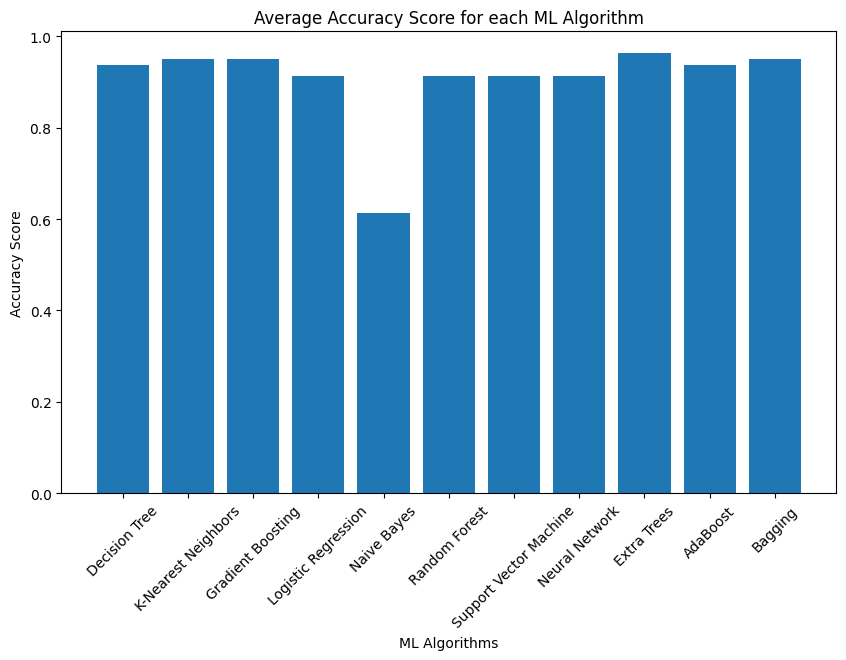

In [58]:
import matplotlib.pyplot as plt

accuracy_scores = {}

#Update the loop to calculate and store the accuracy scores:
for name, classifier in classifiers:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy

#Plot the results:
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(accuracy_scores.keys(), accuracy_scores.values())
ax.set_xlabel('ML Algorithms')
ax.set_ylabel('Accuracy Score')
ax.set_title('Average Accuracy Score for each ML Algorithm')
plt.xticks(rotation=45)
plt.show()
